<a href="https://colab.research.google.com/github/RayOfLight07/Elements_of_AI_ML/blob/main/Experiment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Install necessary libraries if running in a new Google Colab environment
!pip install -q scikit-learn pandas matplotlib seaborn

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Step 1: Load Dataset (Allow user to upload a CSV file)
from google.colab import files
uploaded = files.upload()  # User will upload a CSV file
# Load the uploaded dataset into a DataFrame
df = pd.read_csv(next(iter(uploaded)))
# Display first few rows to understand the dataset
print("First few rows of the dataset:")
df.head()

Saving wine_quality.csv to wine_quality.csv
First few rows of the dataset:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,10.0,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.8,0.076,11,34,0.9978,3.51,0.56,9.4,5


from matplotlib import pyplot as plt
_df_0['fixed_acidity'].plot(kind='hist', bins=20, title='fixed_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['volatile_acidity'].plot(kind='hist', bins=20, title='volatile_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['citric_acid'].plot(kind='hist', bins=20, title='citric_acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['residual_sugar'].plot(kind='hist', bins=20, title='residual_sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='fixed_acidity', y='volatile_acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='volatile_acidity', y='citric_acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='citric_acid', y='residual_sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='residual_sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['fixed_acidity'].plot(kind='line', figsize=(8, 4), title='fixed_acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['volatile_acidity'].plot(kind='line', figsize=(8, 4), title='volatile_acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['citric_acid'].plot(kind='line', figsize=(8, 4), title='citric_acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['residual_sugar'].plot(kind='line', figsize=(8, 4), title='residual_sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Step 2: Data Preprocessing
# 2.1 Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
# If there are missing values, handle them (imputation, removal, etc.)
df = df.fillna(df.mean())  # Fill missing values with the mean of the respective column
# 2.2 Feature Scaling (Standardization)
# Identify the features and target variable
# Assuming the last column is the target variable (adjust if necessary)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values in each column:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Step 3: Model Selection and Training
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)
# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=200, random_state=42)
# Train the Decision Tree model
dt_model.fit(X_train, y_train)
# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
# Step 4: Model Evaluation
# Predict using both models
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
# Performance metrics for Decision Tree
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt, average='weighted')}")
# Performance metrics for Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted')}")
# Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Decision Tree Performance:
Accuracy: 0.5
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666

Logistic Regression Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

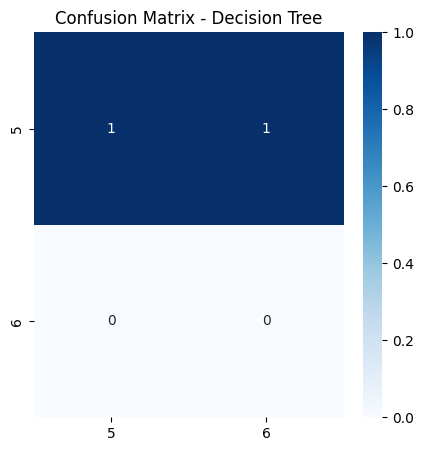

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


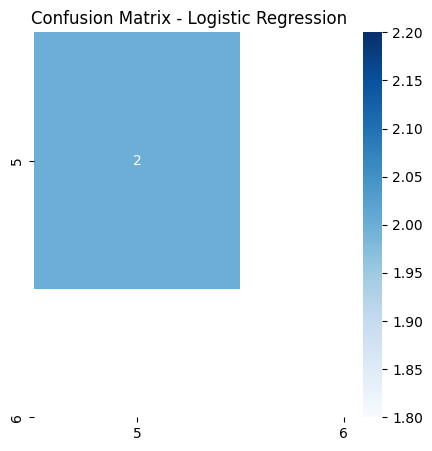

In [ ]:
# Step 5: Visualizations
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y),
yticklabels=np.unique(y))
plt.title('Confusion Matrix - Decision Tree')
plt.show()
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y),
yticklabels=np.unique(y))
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# Step 6: Save Predictions to a CSV File for Download
# Create a DataFrame for predictions
predictions = pd.DataFrame({
'True Labels': y_test,
'Decision Tree Predictions': y_pred_dt,
'Logistic Regression Predictions': y_pred_lr
})